In [10]:
import requests
import csv
from bs4 import BeautifulSoup
import urllib

linkList = list()
# Modified from standard beautifulsoup usage- see Py4e

#It was determined that there are 18 search pages.
for i in range(1,19):
    url = "https://marylandsbest.maryland.gov/page/" + str(i) + "/?orderby=post_title&order=asc&geo-radius=1000&s&geo-lat&geo-lng&categories=0&locations=0&dir-search=yes"
    html = urllib.request.urlopen(url).read()

    soup = BeautifulSoup(html, features="html5lib")
    print("Retrieved from website - page " + str(i))
    # Retrieve anchor tags
    tags = soup('a')
    for tag in tags:
        # Added the try block- getting some errors converting href tags.
        try:
            producerLink = tag.get('href', None)
            if 'https://marylandsbest.maryland.gov/producer/' in producerLink:
                linkList.append(producerLink)

        except TypeError as err:
            print(err)
            print(type(err).__name__)

with open('C://Users//stoandel//Documents//PythonProgramming//mdBest//producerLinks.csv', 'w', newline = '') as csvFile:
    csvWriter = csv.writer(csvFile)

    linkList = list( dict.fromkeys(linkList) )

    for link in linkList:
        csvWriter.writerow([link])

Retrieved from website - page 1
Retrieved from website - page 2
Retrieved from website - page 3
Retrieved from website - page 4
Retrieved from website - page 5
Retrieved from website - page 6
Retrieved from website - page 7
argument of type 'NoneType' is not iterable
TypeError
argument of type 'NoneType' is not iterable
TypeError
Retrieved from website - page 8
Retrieved from website - page 9
Retrieved from website - page 10
Retrieved from website - page 11
Retrieved from website - page 12
Retrieved from website - page 13
Retrieved from website - page 14
Retrieved from website - page 15
argument of type 'NoneType' is not iterable
TypeError
Retrieved from website - page 16
Retrieved from website - page 17
Retrieved from website - page 18


The first row from the new csv file will be read in to explore the page structure.

In [1]:
import requests
import csv
from bs4 import BeautifulSoup
import urllib
import pandas as pd

data = pd.read_csv('C://Users//stoandel//Documents//PythonProgramming//mdBest//producerLinks.csv', header=None, nrows=1).at[0,0]
html = urllib.request.urlopen(data).read()

soup = BeautifulSoup(html, features="html5lib")

# Retrieve anchor tags
tags = soup('a')
for tag in tags:
    # Added the try block- getting some errors converting href tags.
    try:
        #producerLink = tag.get('href', None)
        print(tag)

    except TypeError as err:
        print(err)
        print(type(err).__name__)

<a class="trademark" href="https://marylandsbest.maryland.gov/">
					<img alt="logo" src="https://marylandsbest.maryland.gov/wp-content/uploads/md-best-logo2.png"/>
				</a>
<a href="https://www.facebook.com/pages/Marylands-Best/89703601400"><img alt="Facebook" height="24" src="https://marylandsbest.maryland.gov/wp-content/themes/directory/design/img/social-icons/facebook-ff.png" title="Facebook" width="24"/></a>
<a href="https://twitter.com/MDsBest"><img alt="Follow us on Twitter" height="24" src="https://marylandsbest.maryland.gov/wp-content/themes/directory/design/img/social-icons/twitter-ff.png" title="Follow us on Twitter" width="24"/></a>
<a href="http://www.youtube.com/user/marylandsbest1/videos"><img alt="YouTube" height="24" src="https://marylandsbest.maryland.gov/wp-content/themes/directory/design/img/social-icons/youtube-ff.png" title="YouTube" width="24"/></a>
<a href="#">Features</a>
<a href="https://marylandsbest.maryland.gov/meet-the-farmers/">Meet The Farmers</a>
<a hr

Of note are the operation name, GIS data, commodities, and acreage. Contact information can also be gained from this page, but this is not relevant for this analysis. Exploring the web page in a browser shows that all of the possible commodity types are visible, easing the process of finding factor levels.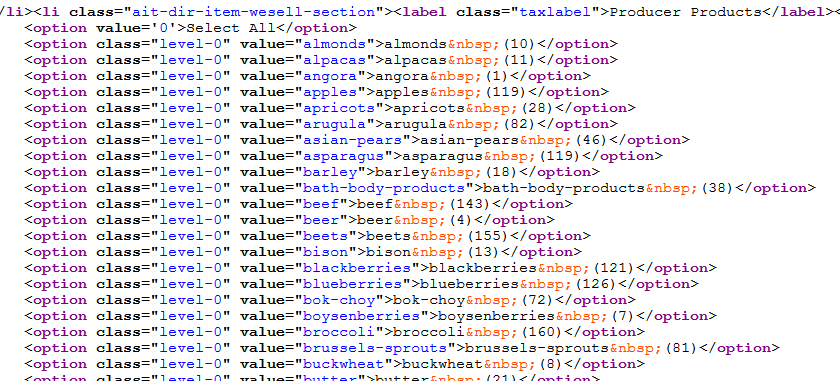

In [2]:
import csv
commodityTypes = list()
with open('C://Users//stoandel//Documents//PythonProgramming//mdBest//commodityTypes.csv', 'r', newline = '') as csvFile:
    csvReader = csv.reader(csvFile)
    
    for i in csvReader:
        commodityTypes.append(i[0])
print(commodityTypes)

['almonds', 'alpacas', 'angora', 'apples', 'apricots', 'arugula', 'asian-pears', 'asparagus', 'barley', 'bath-body-products', 'beef', 'beer', 'beets', 'bison', 'blackberries', 'blueberries', 'bok-choy', 'boysenberries', 'broccoli', 'brussels-sprouts', 'buckwheat', 'butter', 'buttermilk', 'cabbage', 'cantaloupes', 'carrots', 'cashmere', 'cattle-beef', 'cattle-dairy', 'cauliflower', 'celery', 'cheese', 'cherries', 'chestnuts', 'chicken', 'christmas-wreaths', 'collards', 'compost-manure', 'corn', 'crabs', 'cress', 'cucumbers', 'currants', 'cut-woody-branches', 'daikin', 'dairy-eggs', 'dog-food', 'dried-flowers', 'dried-herbs', 'drybeans', 'duck', 'earthworms', 'edamame-soybeans', 'edible-flowers', 'eggplant', 'eggs', 'emu', 'endive', 'equine', 'fibers', 'figs', 'firewood', 'flowers-nurseries', 'fruits', 'gamebird', 'garlic', 'geese', 'goats', 'gourds', 'grains-forage', 'grapes', 'green-beans', 'green-onions', 'green-peppers', 'hay', 'heirloom-tomatoes', 'herbs', 'honey', 'horse-boarding',

For extracting commodity data, we will retrieve anchor tags containing "a href="/?dir-search=yes&amp;orderby=post_title&amp;order=asc&amp;s=%22" and separate out the commodity name using the list of commodity types.

In [50]:
import requests
import csv
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import time

#data = pd.read_csv('C://Users//stoandel//Documents//PythonProgramming//mdBest//producerLinks.csv', header=None, nrows=20).at[0,0]

# Make a unique integer ID for each ID- identifying information is not wanted.
id = 1

with open('C://Users//stoandel//Documents//PythonProgramming//mdBest//producer_links_1.csv','r') as data:
    data_reader = csv.reader(data, delimiter=' ', quotechar='|')
    for url in data_reader:
        print(url)
        html = urllib.request.urlopen(url[0]).read()

        # Local file for testing:
        #data = "C://...//2021 Castle Hill Farm (Vorac Suffolks) — Custom-Processed Lamb — Suffolk Breeding Stock — 4-H Project Lambs — Grass Hay Bales — Compost Marylands Best.htm"
        #html = open(data, 'r', encoding="utf-8")

        soup = BeautifulSoup(html, features="html5lib")
        
        # This is not used
        # Get the producer's name
        #producer = soup.find("title").contents[0]

        # Create a list for location information and for commodity information
        address_list = [id]
        commodity_list = [id]

        # Retrieve address and contact information
        # This is very specific, and will fail to retrieve email addresses and websites
        tag = soup.find(class_="item-address")

        for i in tag.find_all("dd"):
            address_info.append(i.text)

        # Get commodity information.
        for i in soup.find_all("a"):

            if "/?dir-search=yes&orderby=post_title&order=asc&s=%22" in i['href']:
                commodity_list.append(i.contents[0])


        with open('C://Users//stoandel//Documents//PythonProgramming//mdBest//address_info.csv', 'a+', newline='') as f:  
            writer = csv.writer(f)
            writer.writerow(address_info)

        with open('C://Users//stoandel//Documents//PythonProgramming//mdBest//commodity_list.csv', 'a+', newline='') as f:  
            writer = csv.writer(f)
            writer.writerow(commodity_list)
        
        id = id + 1
        
        # A pause is used to ensure that there are not issues with the server.
        # Since there are not that many URLs to go through, thee is no provlem with waiting a few minutes.
        time.sleep(1)

['https://marylandsbest.maryland.gov/producer/stonecrest-farms/']
['https://marylandsbest.maryland.gov/producer/sudlersville-meat-locker/']
['https://marylandsbest.maryland.gov/producer/sugarloaf-sustainable-farms/']
['https://marylandsbest.maryland.gov/producer/summers-farm-inc/']
['https://marylandsbest.maryland.gov/producer/susan-inglehart-s-flowers/']
['https://marylandsbest.maryland.gov/producer/takoma-park-farmers-market/']
['https://marylandsbest.maryland.gov/producer/talmar-farms/']
['https://marylandsbest.maryland.gov/producer/taneytown-farmers-market/']
['https://marylandsbest.maryland.gov/producer/teddy-bear-fresh-produce/']
['https://marylandsbest.maryland.gov/producer/the-avenue-at-white-marsh-farmers-market/']
['https://marylandsbest.maryland.gov/producer/the-farm-at-our-house/']
['https://marylandsbest.maryland.gov/producer/the-farmers-market-at-maryland/']
['https://marylandsbest.maryland.gov/producer/the-genuine-food-co/']
['https://marylandsbest.maryland.gov/producer/

Our data has been collected and saved, and is now ready for cleaning and formatting.